##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number:*** 16

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Aryan Gupta, Mihir Kulkarni, Vaibhav Khanna, Darsh Shani

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS0162H, 2021A7PS2689H, 2021A7PS2819H, 2021A7PS2171H


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

## Making Required Imports

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
# removing irrelevant deprecation warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [6]:
dataset = pd.read_csv("Team16_Carbon_Emissions.csv")
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Checking for Null or Missing Values in the Dataset

In [7]:
dataset.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
dataset[dataset == 0].count()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

**Inference**: No null or 0 values are present in the dataset.

## Checking for Duplicated Data in the Dataset

In [9]:
print("Number of duplicates:", dataset.duplicated().sum())
# print unique duplicated rows
print("Number of duplicated unique rows:", dataset[dataset.duplicated(keep=False)].drop_duplicates().shape)

Number of duplicates: 1103
Number of duplicated unique rows: (999, 12)


**Inference**: We see 1103 duplicates of 999 unique rows in the data.
Why should we remove duplicates?
1. The duplicates only lead to overfitting and bias for our dataset, since the feature AND the target values are the same (since we consider a complete row in the dataset for duplicate identification).
2. The target variable (CO2 emmisions) is continuous. Thus, the duplicates are a result of error in data retrieval.

### Removing Duplicates

In [10]:
dataset = dataset.drop_duplicates()

## Getting Dataset info After Cleaning

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

In [12]:
# printing the unique values in all columns
# out of these the values in catagorical columns are informativ
for col in dataset.select_dtypes(include="object").columns:
  print(col, len(dataset[col].unique()))

Make 42
Model 2053
Vehicle Class 16
Transmission 27
Fuel Type 5


**Inference**: The dataset contains 5 qualitative columns (indicated by data type object), these are nominal catagorical columns and cannot be represented as integers. Out of these columns *Model* has 2053 unique values, 42 for *Make*, 16 for *Vehicle class*, 27 for *Transmission* and 5 for *Fuel Type*.

In [13]:
print(dataset["Model"].value_counts().mean())
dataset["Model"].value_counts()

3.059912323429128


F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               27
FOCUS FFV             24
F-150 4X4             20
                      ..
LS 500                 1
LS 500h                1
NX 300 AWD F SPORT     1
RX 350 L AWD           1
XC40 T4 AWD            1
Name: Model, Length: 2053, dtype: int64

**Note**: There are 2053 unique values for the *Model* field on printing its distribution, we see that on average there are only 3 datapoints per value of the column. There are far too little instances of multiple models to fairly compare them to eachother. Not only this, but binarising this value in the next step would be extremely messy, producing 2053 new columns. Thus we drop this column.

### Description of the numerical columns

In [14]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


**Inferences**:
1. The range of our target *CO2 Emissions* is between 96 and 522.
2. Mean *CO2 Emissions* is 250.58 and median is 246.
3. All the features are positively skewed (max is much greater than 75th percentile).
4. *Fuel Consumption Hwy (L/100 km)* seems significantly more skewed than the other features.
5. *CO2 Emissions(g/km)* is the least skewed feature.

## Initial Data Plots

### Exploring Categorical Features impact on co2 emmisions

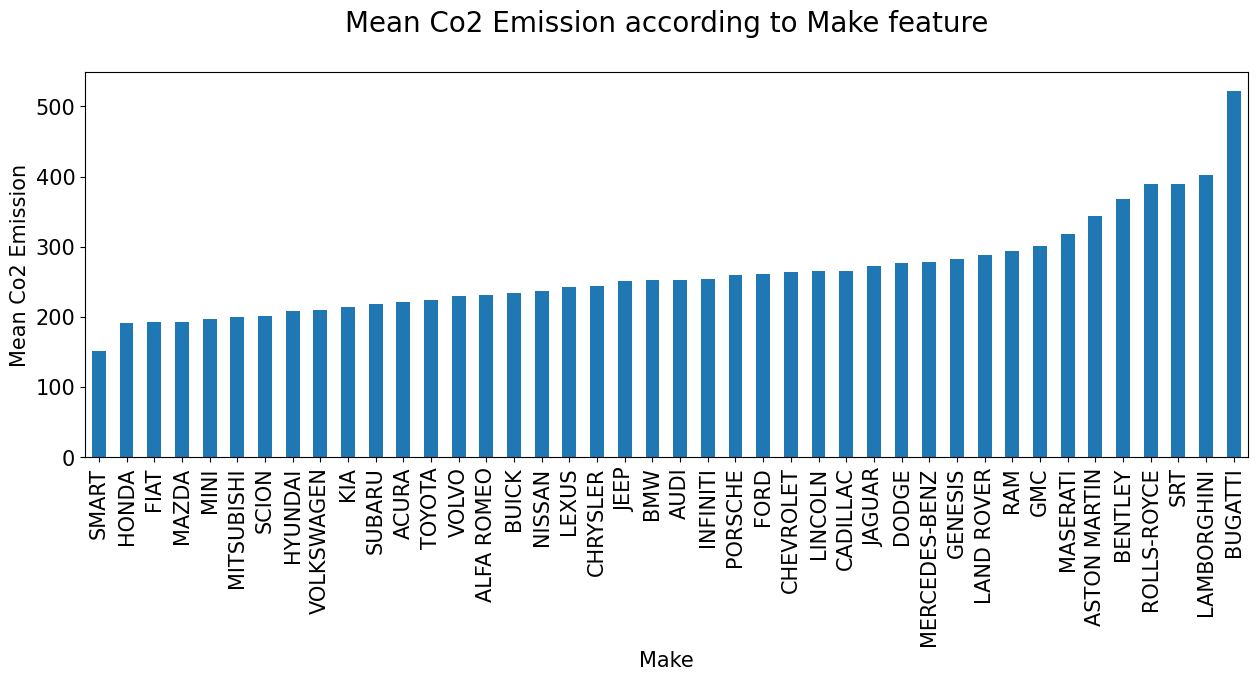

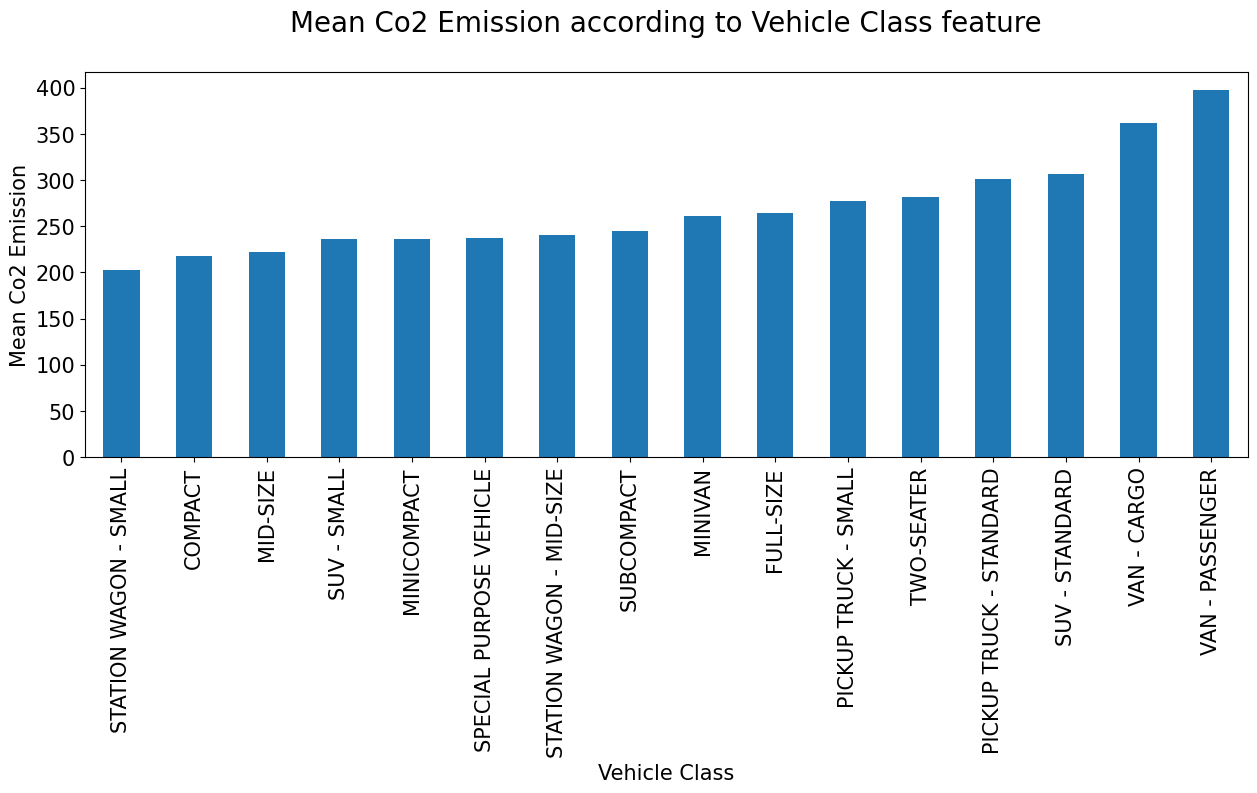

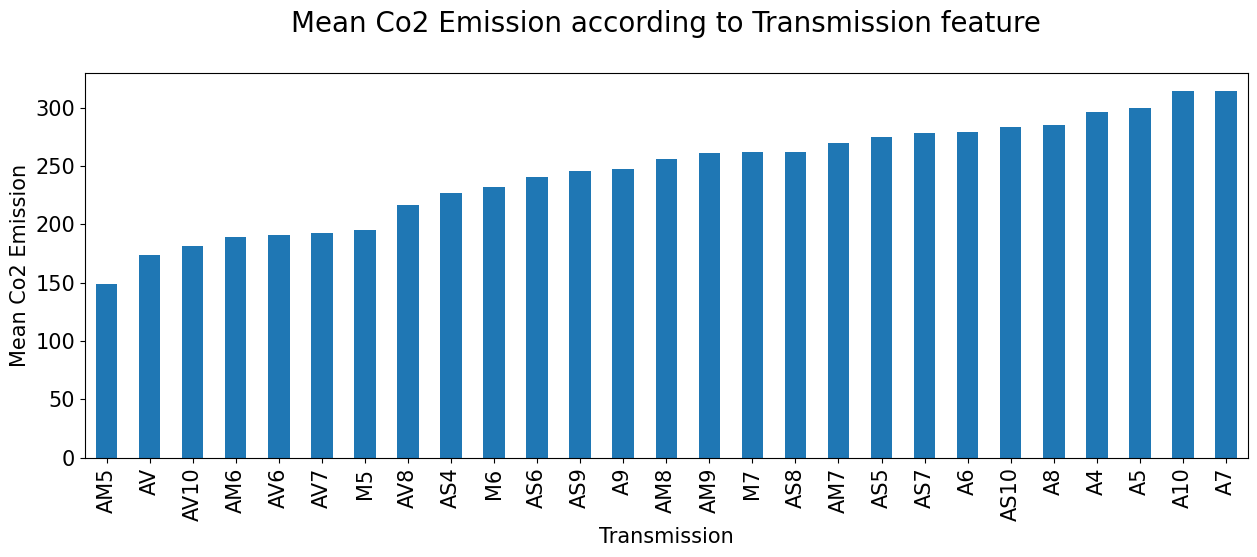

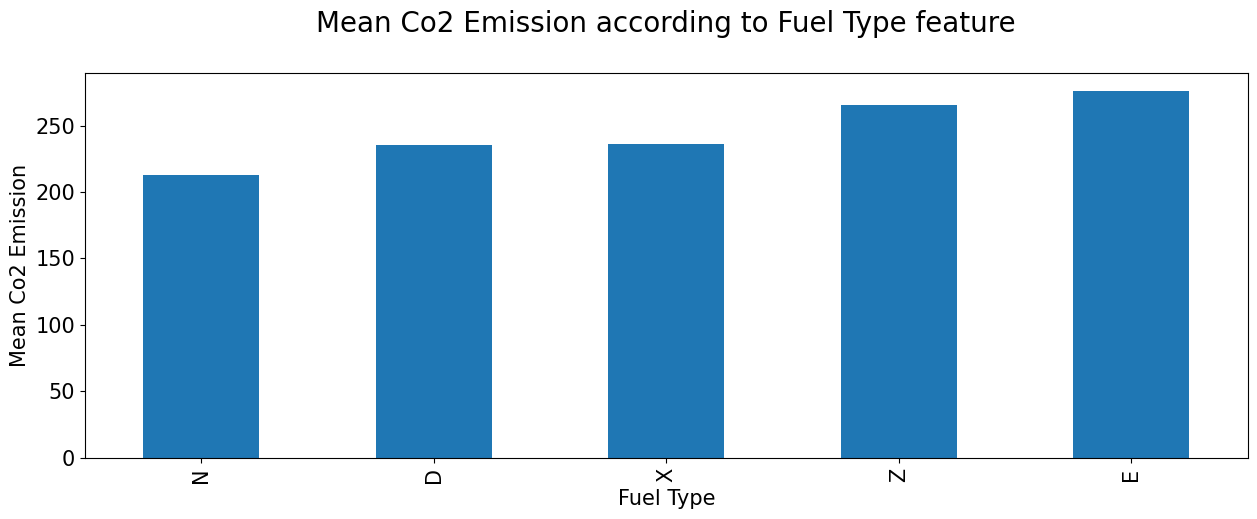

In [15]:
def explore_categorical_feature(feature):
  group = dataset.groupby(feature)
  plt.figure(figsize=[15,5])
  plots = group['CO2 Emissions(g/km)'].mean().sort_values().plot(kind = 'bar', fontsize=15)
  plt.xlabel(feature, fontsize=15)
  plt.ylabel('Mean Co2 Emission', fontsize=15)
  plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)
  plt.show()
for feature in ["Make", 'Vehicle Class', 'Transmission', 'Fuel Type']:
  explore_categorical_feature(feature)

**Inferences**:
1. According to aboce plots: Cars of luxurious *Make* tend to have more co2 emmisions than economic cars. Bugatti, Lamborghini lie on the higher end, while Honda, Mitsubishi lie on the lower end.
2. Other plots are not as conclusive, larger *Vehicle Class* tends to have more emmisions, but two-wheelers seem to be an exception.
3. *Transmission* is inconclusive on its own. We combine all gears of a single transmission type into one, to increase the quality of data.
4. We see slight increase in emissions with the type of fuel used.

### Merging Transmission Gears

In [16]:
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "automatic", dataset["Transmission"])
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "automated_manual", dataset["Transmission"])
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "automatic_with_select_shift", dataset["Transmission"])
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "continuously_variable", dataset["Transmission"])
dataset["Transmission"] = np.where(dataset["Transmission"].isin(["M5", "M6", "M7"]), "manual", dataset["Transmission"])

### Checking Transmission After Merge

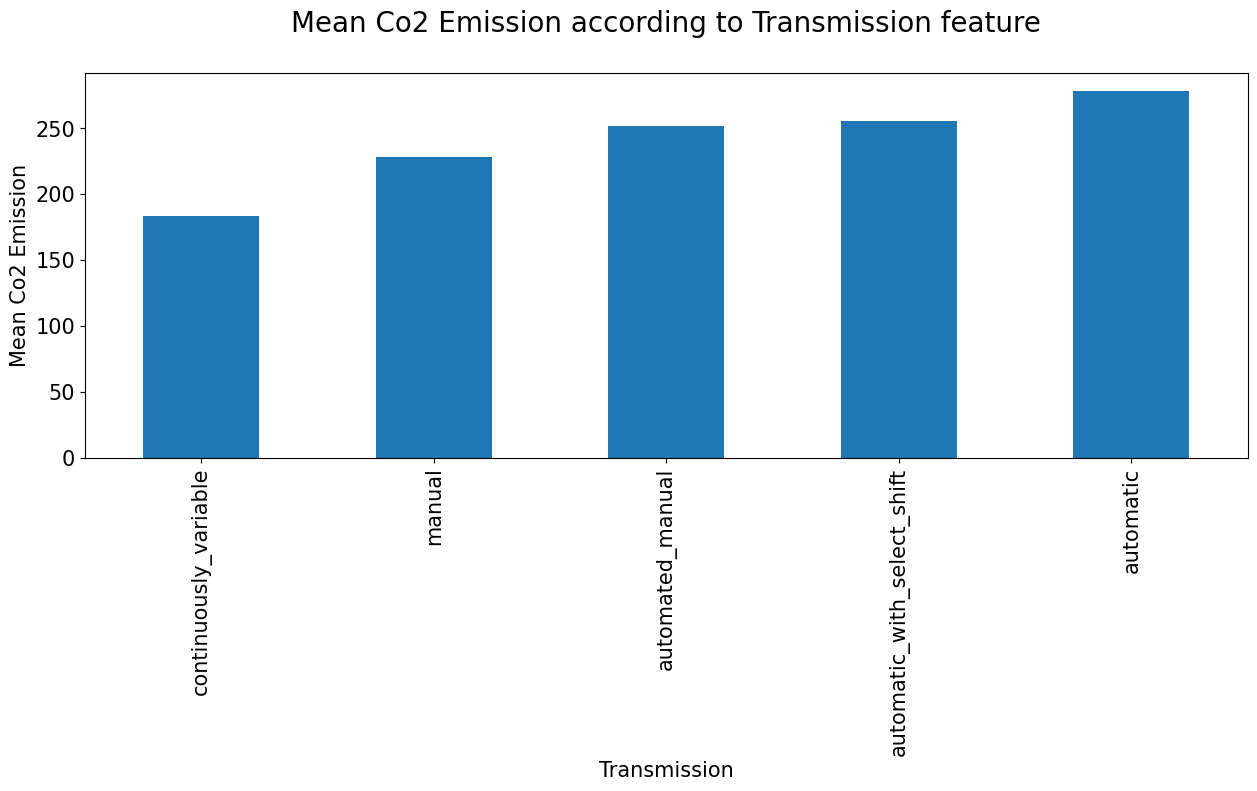

In [17]:
group = dataset.groupby("Transmission")
plt.figure(figsize=[15,5])
plots = group['CO2 Emissions(g/km)'].mean().sort_values().plot(kind = 'bar', fontsize=15)
plt.xlabel("Transmission", fontsize=15)
plt.ylabel('Mean Co2 Emission', fontsize=15)
plt.title("Mean Co2 Emission according to {} feature\n".format("Transmission"), fontsize=20)
plt.show()

**Inference**: After the merge, we gain conclusive observation that Automatic has the highest emissions, while Continuously Variable has the lowest.

### Exploring frequencies of categorical features

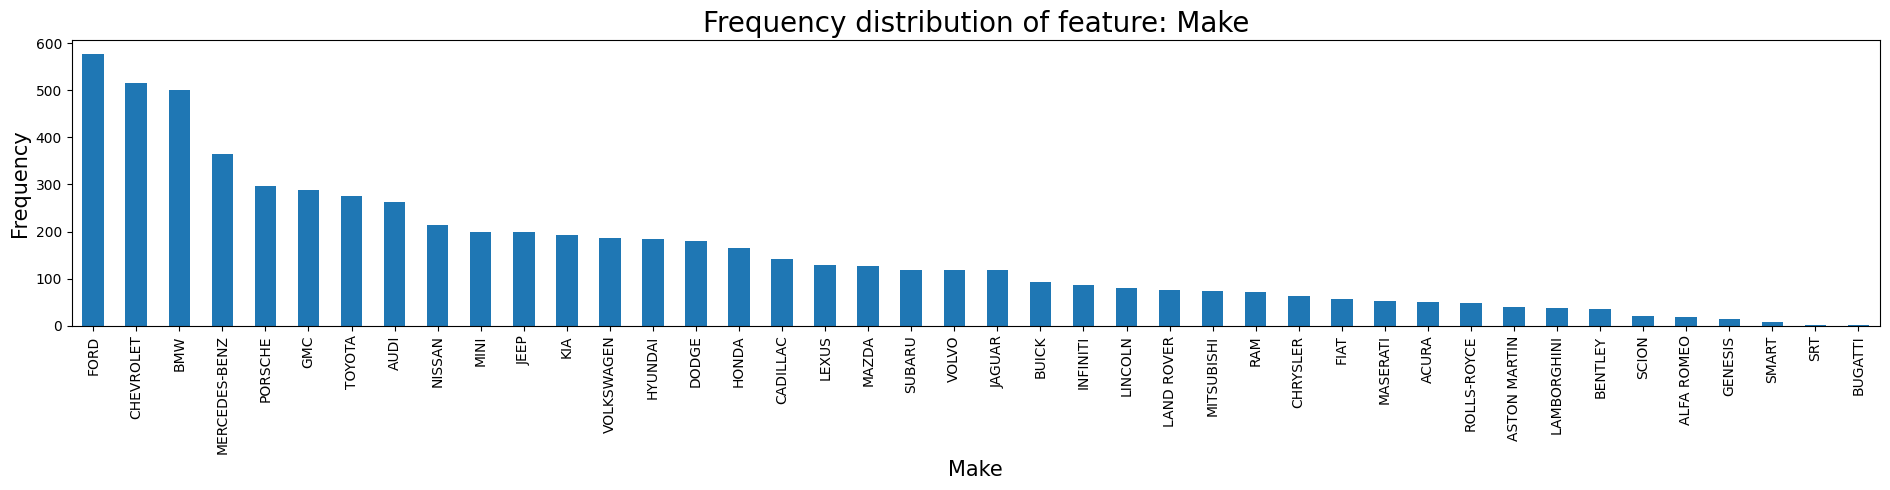

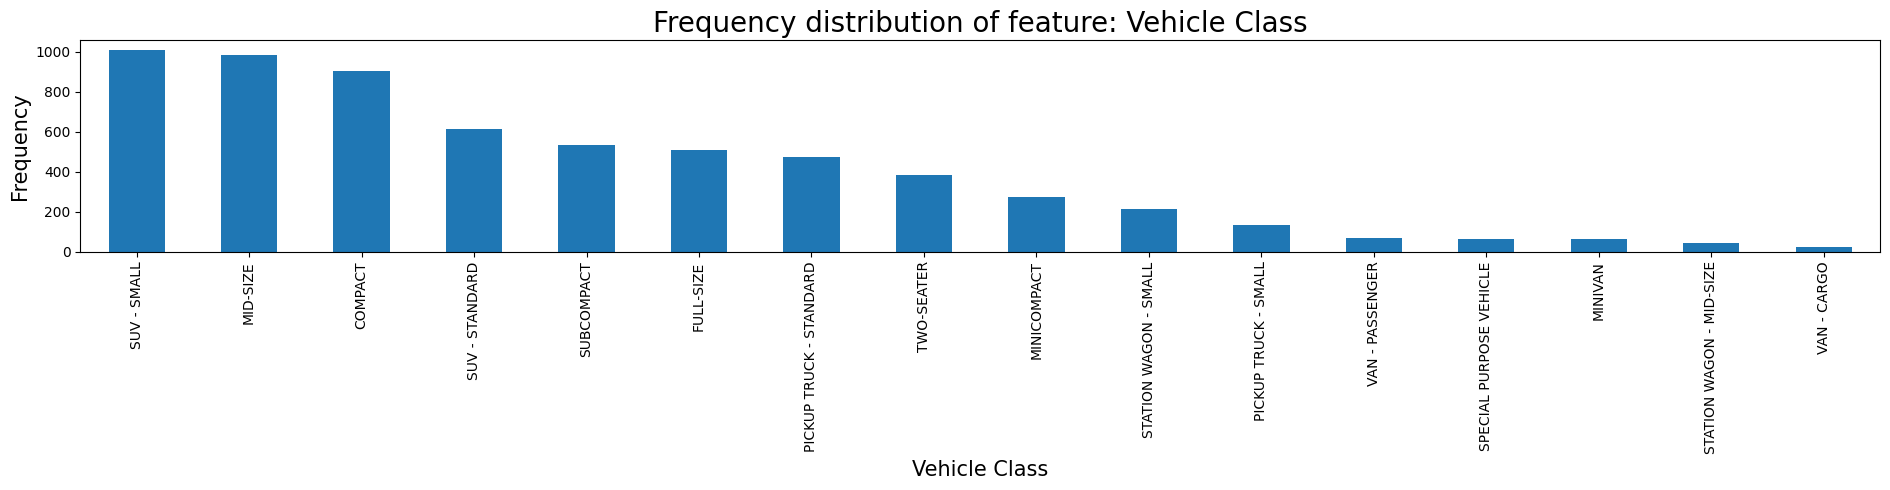

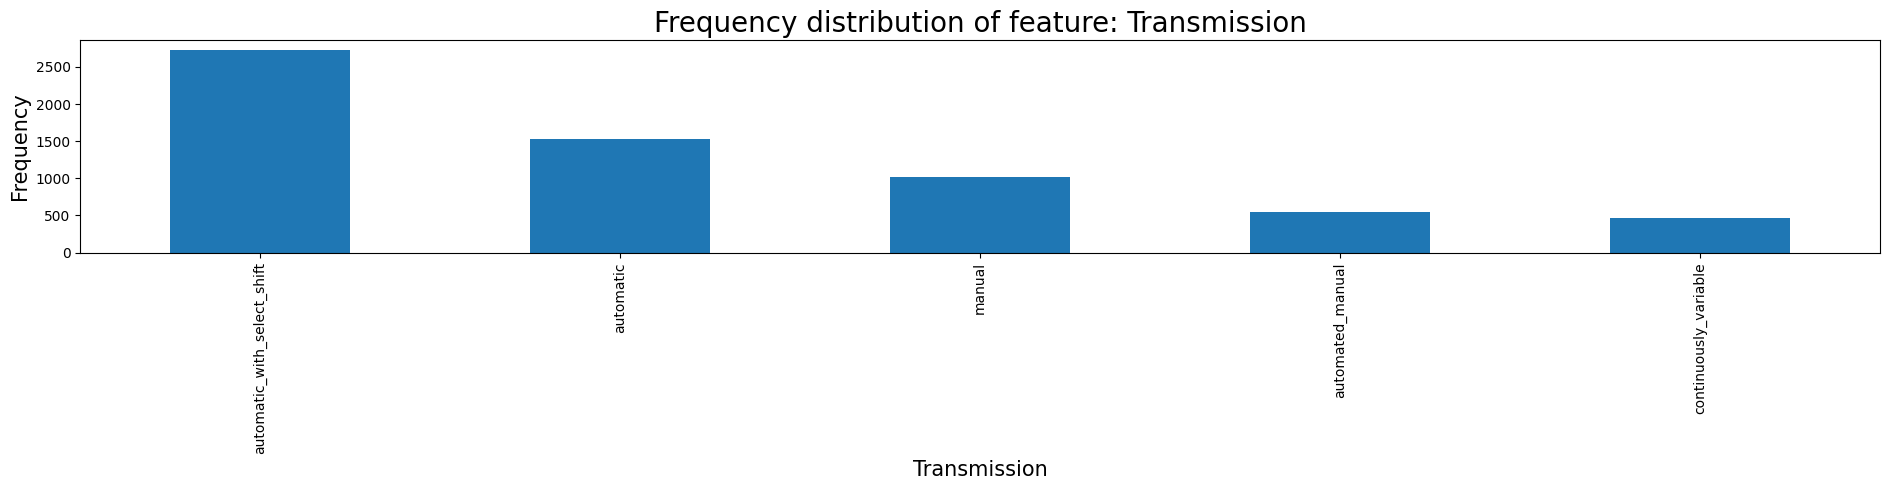

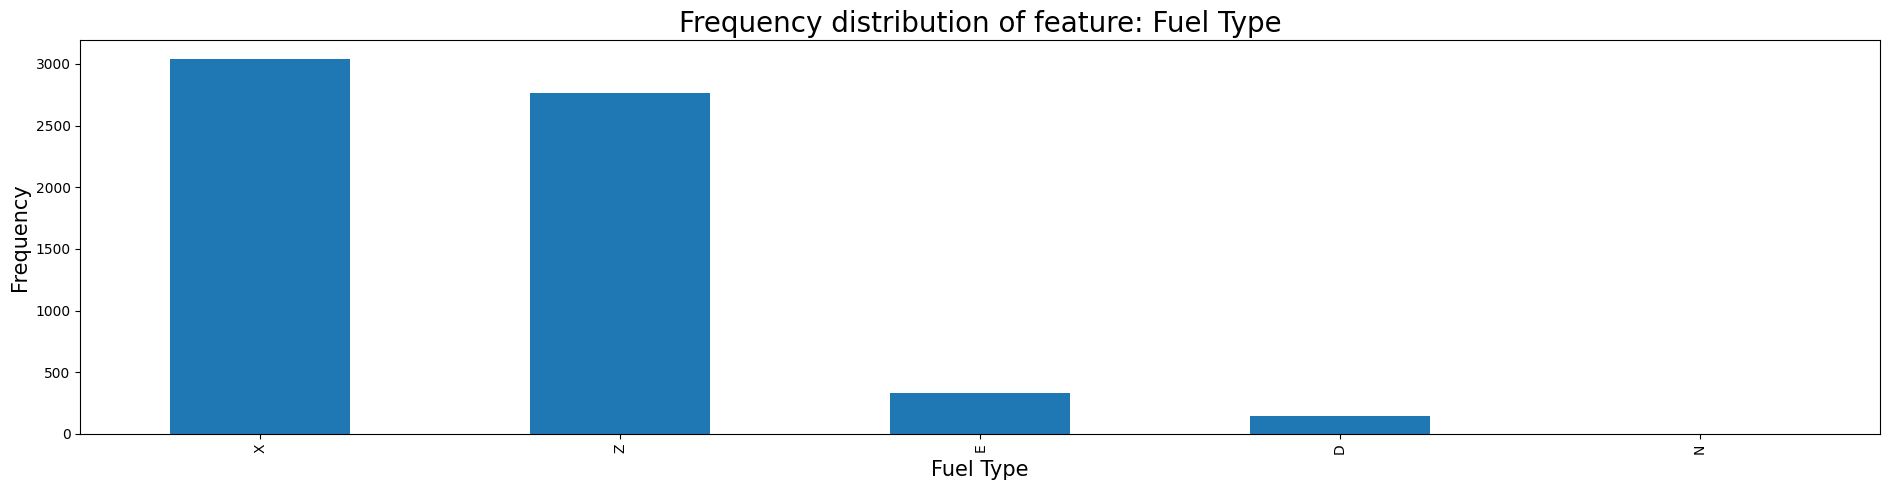

In [18]:
for col in ["Make", "Vehicle Class", "Transmission", "Fuel Type"]:
  plt.figure(figsize=(19,5))
  dataset.groupby(col)[col].count().sort_values(ascending=False).plot(kind="bar")
  plt.title("Frequency distribution of feature: "+col, fontsize=20)
  plt.ylabel("Frequency", fontsize=15)
  plt.xlabel(col, fontsize=15)
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

**Inferences**:
1. Out of the 42 car brands Ford(628) and Chevrolet(588) are the most dominating ones. Whereas cars of Smart(7), Bugati(3) and SRT(2) are the ones with lowest frequency.
2. SUV-Small(1217) and MID-Size(1133) vehicles are the most frequent ones on Canadian roads.
3. Frequency of car with Transmission type Automatic with Select Shift(3127) is the highest and with Continuously Variable Transmission(576) is the lowest.
4. Car which runs on Gasoline let it be X(3637) or Z(3202) is the most common type. And cars running on D(175) are very low in frquency and there is only one sample which uses N.

We delete the sample that uses N, since it is not possible to make accurate predictions with only one data point.

In [19]:
dataset = dataset[dataset["Fuel Type"] != "N"]

### Exploring the impact of Numerical features

#### Correlation Table

In [20]:
dataset[dataset.describe().columns].corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834233,0.766816,0.820145,-0.762957,0.854870
Cylinders,0.928843,1.000000,0.801290,0.717645,0.781104,-0.723741,0.834739
Fuel Consumption City (L/100 km),0.834233,0.801290,1.000000,0.950832,0.994054,-0.927634,0.918900
Fuel Consumption Hwy (L/100 km),0.766816,0.717645,0.950832,1.000000,0.978618,-0.891912,0.883475
Fuel Consumption Comb (L/100 km),0.820145,0.781104,0.994054,0.978618,1.000000,-0.925798,0.916953
Fuel Consumption Comb (mpg),-0.762957,-0.723741,-0.927634,-0.891912,-0.925798,1.000000,-0.906929
CO2 Emissions(g/km),0.854870,0.834739,0.918900,0.883475,0.916953,-0.906929,1.000000


#### Correlation Heatmap

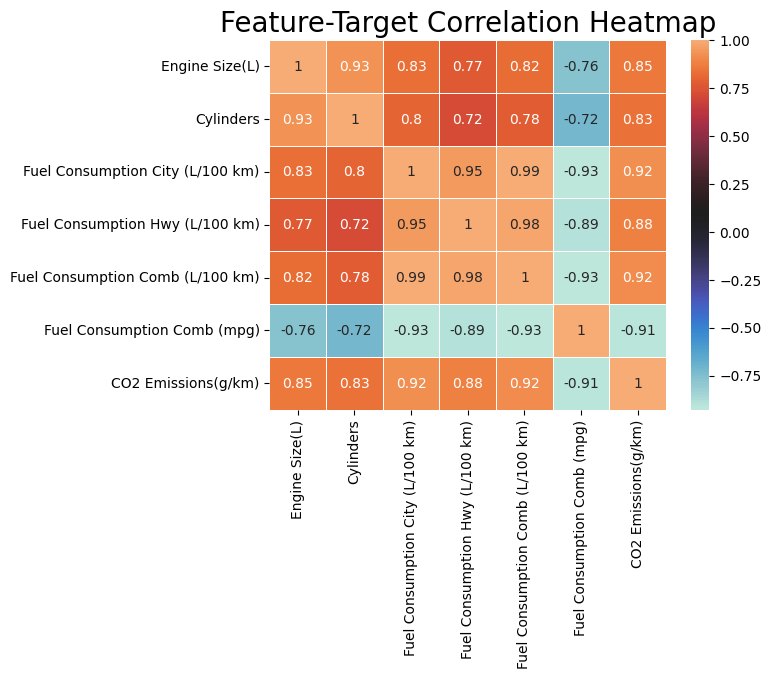

In [21]:
sns.heatmap(dataset.select_dtypes(include=np.number).corr(), linewidths=0.5, annot=True, center = 0.1)
plt.title("Feature-Target Correlation Heatmap", fontsize=20)
plt.show()

#### Pairplot

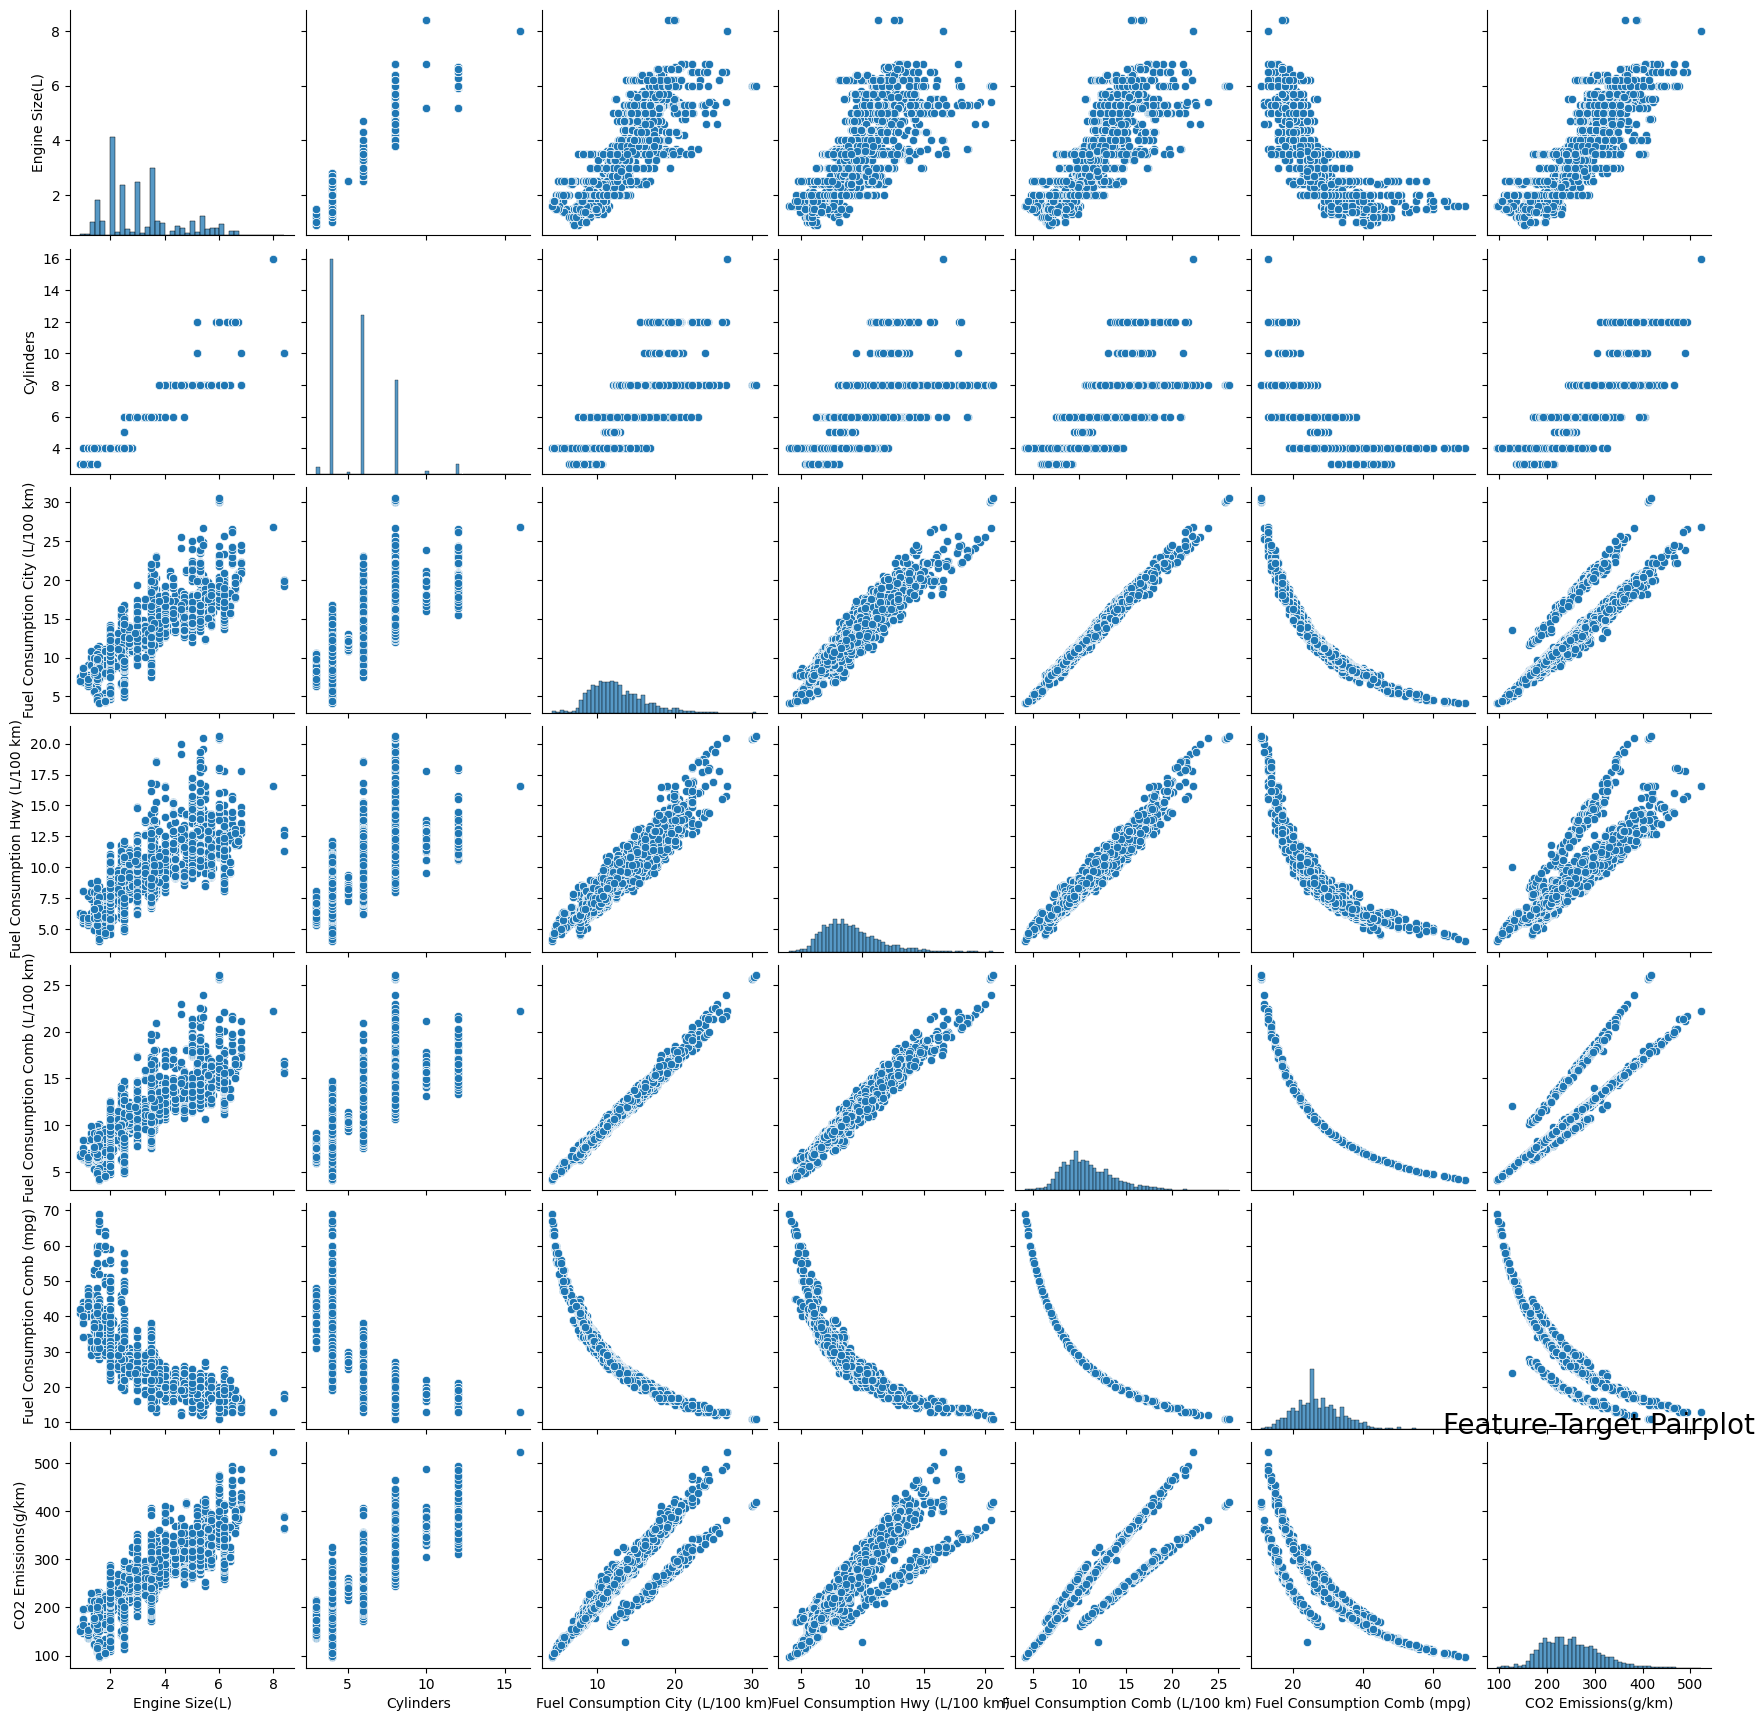

In [22]:
sns.pairplot(dataset.select_dtypes(include=np.number))
plt.title("Feature-Target Pairplot", fontsize=20)
plt.show()

**Inference**:
1. We see an increase in *CO2 Emissions* with increasing *Engine Size* and *Cylinders* (strong positive correlation).
2. Emission increases with increase in *Fuel Consumption (City, Hwy, Comb (L/100km))* (strong positive correlation).
3. Emission decreases with increase in *Fuel Consumption Comb (mpg)* (strong negative correlation).
4. It should also be noted that Numerical columns have much more impact on the data compared to the categorical columns

## Outlier Detection - Box Plots

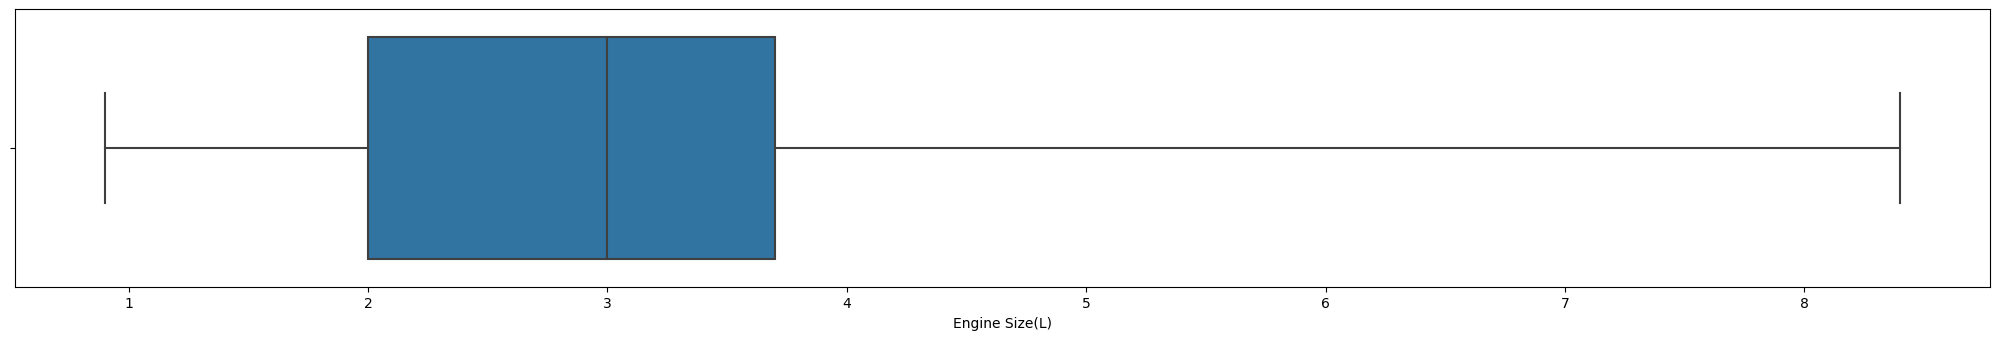

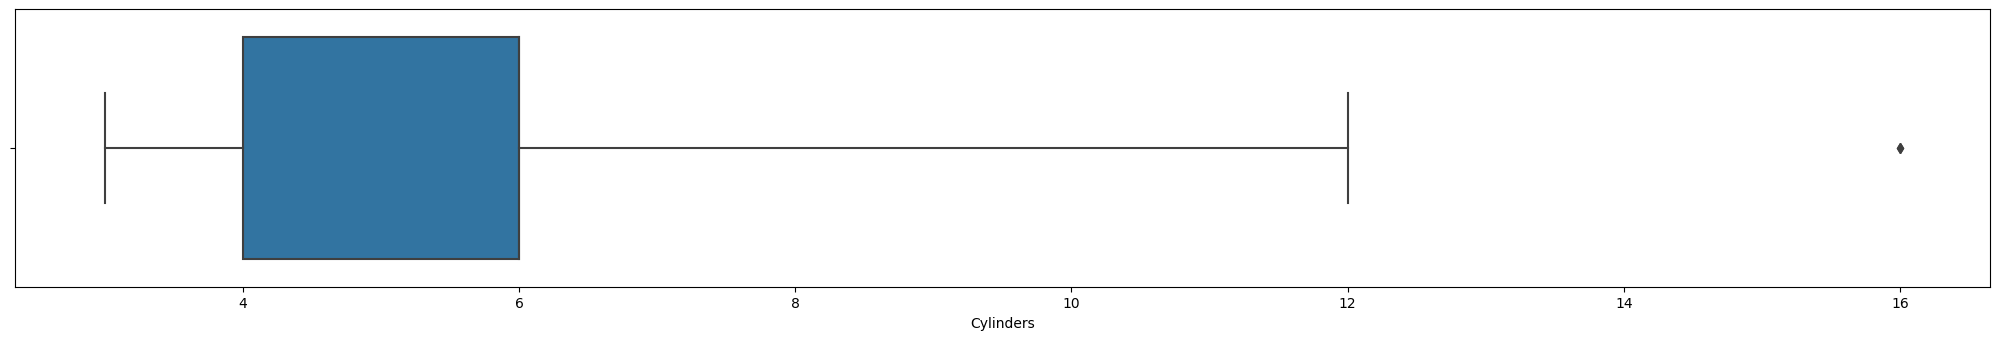

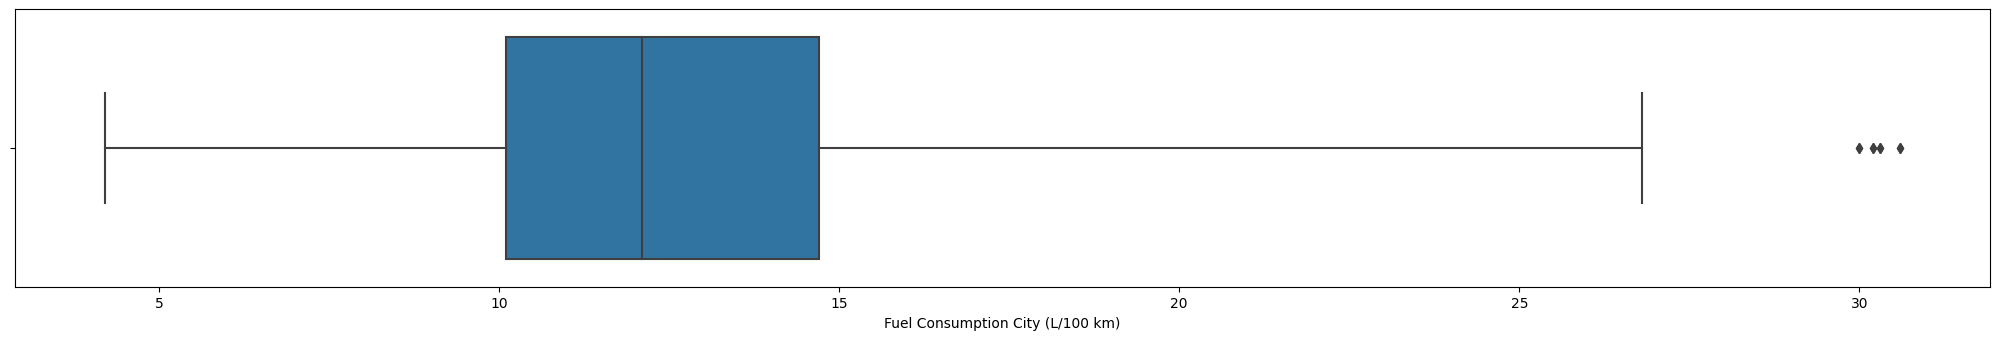

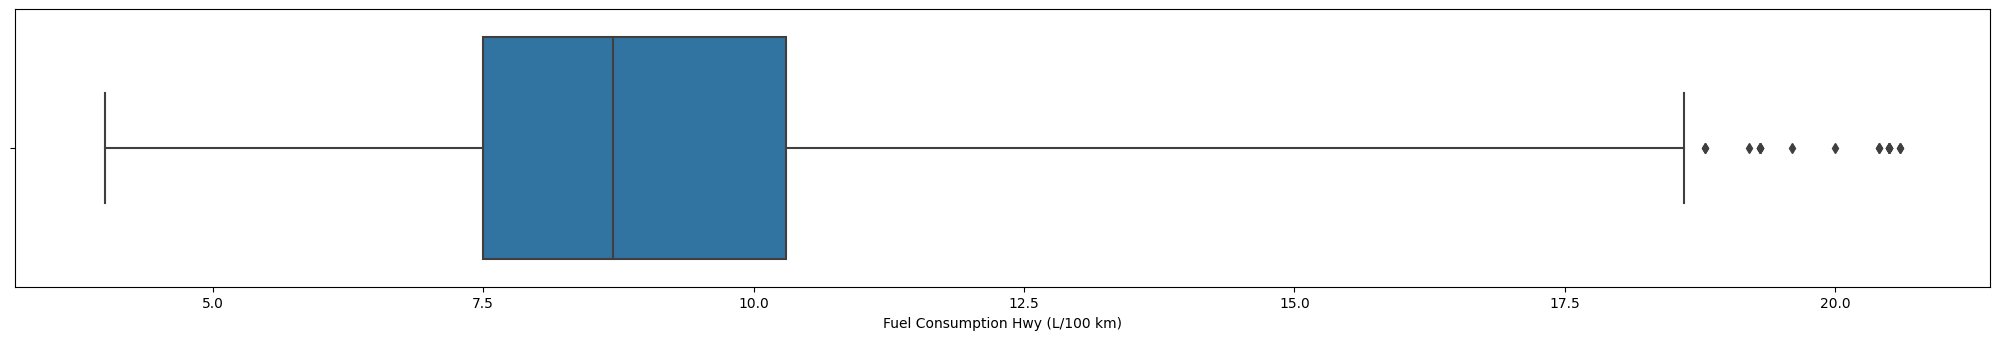

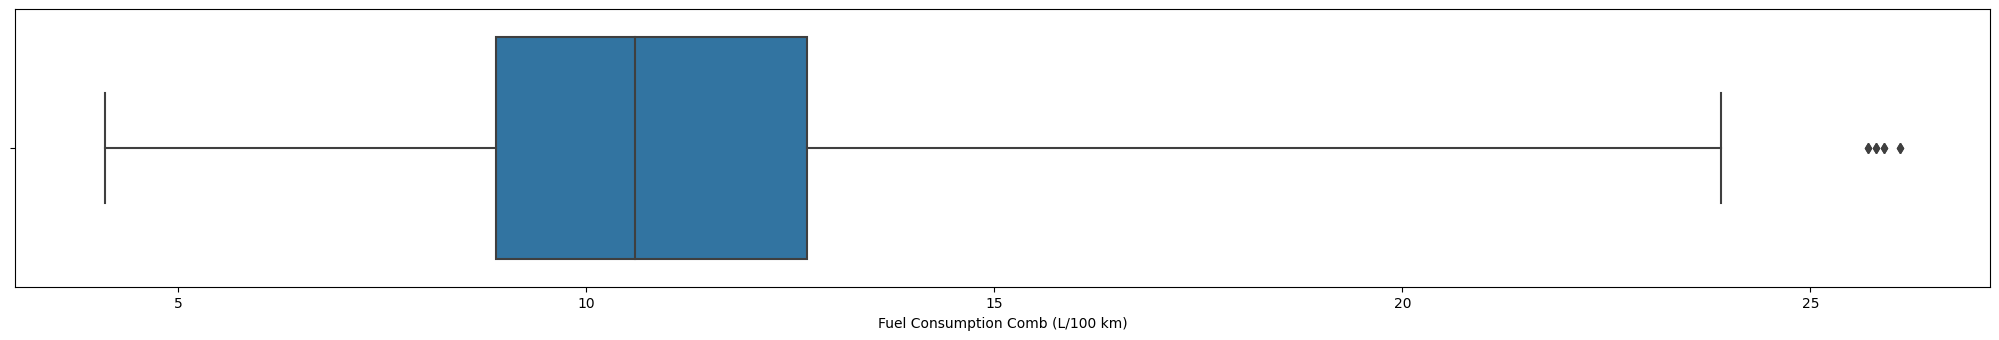

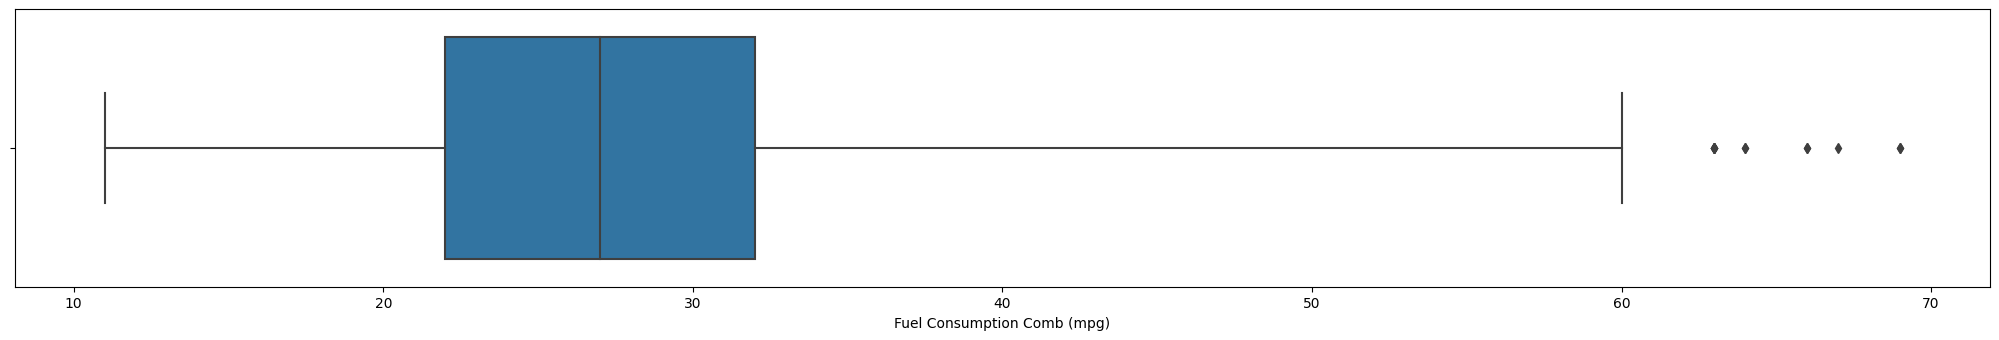

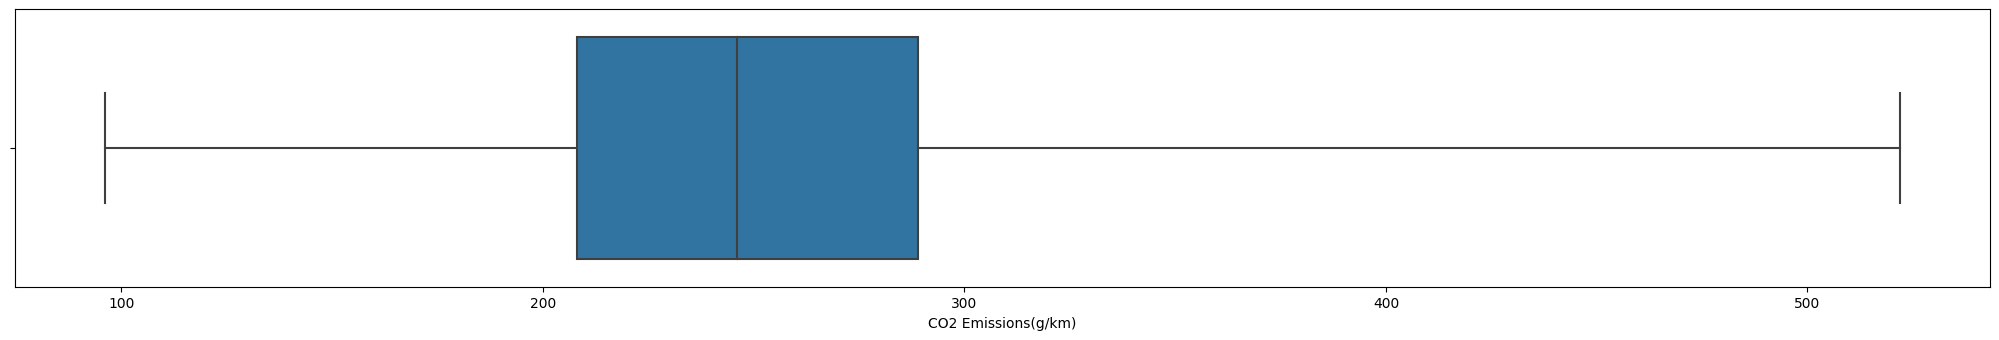

In [23]:
index=0
for feature in dataset.select_dtypes(include=np.number).columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(dataset.columns)),2,index)
    sns.boxplot(x=feature,data=dataset,whis=3)

    plt.tight_layout()

    plt.show()

**Inference**: For proper representation in the dataset, these outliers are important and should not be removed.

## Renaming Columns in the dataset
We rename columns and drop some categorical features like *Model*, *Make*, *Transmission* and *Vehicle Class* due to their low effect and large quantity.

In [24]:
# Change the column names and makes them useful for the future
renamed_columns = {
  'Engine Size(L)': 'engine_size',
  'Cylinders': 'cylinders',
  'Fuel Type': 'fuel_type',
  'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
  'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
  'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
  'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
  'CO2 Emissions(g/km)': 'co2'
}
dataset.drop("Model", axis = 1, inplace = True)
dataset.drop("Make", axis = 1, inplace = True)
dataset.drop("Transmission", axis = 1, inplace = True)
dataset.drop("Vehicle Class", axis = 1, inplace = True)
dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="Z", "premium_gasoline", dataset["Fuel Type"])
dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="X", "regular_gasoline", dataset["Fuel Type"])
dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="D", "diesel", dataset["Fuel Type"])
dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="E", "ethanol", dataset["Fuel Type"])
# dataset["Fuel Type"] = np.where(dataset["Fuel Type"]=="N", "natural_gas", dataset["Fuel Type"])
dataset.rename(renamed_columns, axis='columns', inplace=True)
dataset

,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,2.0,4,premium_gasoline,9.9,6.7,8.5,33,196
1,2.4,4,premium_gasoline,11.2,7.7,9.6,29,221
2,1.5,4,premium_gasoline,6.0,5.8,5.9,48,136
3,3.5,6,premium_gasoline,12.7,9.1,11.1,25,255
4,3.5,6,premium_gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
7380,2.0,4,premium_gasoline,10.7,7.7,9.4,30,219
7381,2.0,4,premium_gasoline,11.2,8.3,9.9,29,232
7382,2.0,4,premium_gasoline,11.7,8.6,10.3,27,240
7383,2.0,4,premium_gasoline,11.2,8.3,9.9,29,232


## Adding Dummies for Categorical Data
We add dummy 1-hot encoded columns for the categorical data in our dataset to convert them into numerical values to be used in our models.

In [25]:
dataset = pd.get_dummies(dataset, drop_first=True, columns=["fuel_type"])
dataset

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2,fuel_type_ethanol,fuel_type_premium_gasoline,fuel_type_regular_gasoline
0,2.0,4,9.9,6.7,8.5,33,196,0,1,0
1,2.4,4,11.2,7.7,9.6,29,221,0,1,0
2,1.5,4,6.0,5.8,5.9,48,136,0,1,0
3,3.5,6,12.7,9.1,11.1,25,255,0,1,0
4,3.5,6,12.1,8.7,10.6,27,244,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0,1,0
7381,2.0,4,11.2,8.3,9.9,29,232,0,1,0
7382,2.0,4,11.7,8.6,10.3,27,240,0,1,0
7383,2.0,4,11.2,8.3,9.9,29,232,0,1,0


## Saving Preprocessed Dataset

In [26]:
dataset.to_csv("Team16_Preprocessed.csv")

## Defining Test Train Split Function

In [27]:
import numpy as np
import pandas as pd
# random state provides reproducible results through seed
# this is also used in train validation split
def test_train_split(dataset: pd.DataFrame, test_size = 0.20, random_state = 0):
  np.random.seed(random_state)
  # shuffle indices
  indices = np.random.permutation(len(dataset)).tolist()
  dataset_test_size = int(dataset.shape[0]*test_size)

  # separating test-train indices
  test_indices = indices[:dataset_test_size]
  train_indices = indices[dataset_test_size:]
  return (dataset.iloc[test_indices], dataset.iloc[train_indices])

## Defining Standardization Function

In [28]:
def standardize(data: pd.DataFrame, skip: str|None = None) -> None:
  for col in data.columns:
    if skip != col:
      # standardizing data
      data[col] = (data[col] - data[col].mean())/data[col].std()

## Defining Metric Functions

In [29]:
def MSE(Y_pred: np.ndarray, Y_test: np.ndarray) -> float:
  return np.sum(np.square(Y_pred-Y_test))/Y_test.shape[0]

def rsquared_score(Y_pred: np.ndarray, Y_test: np.ndarray) -> float:
  data_var = np.sum((Y_test-np.mean(Y_test,axis=0))**2)
  model_var = np.sum((Y_pred-Y_test)**2)
  expl_var = data_var-model_var
  return float(expl_var/data_var)

# ***2. ML Model 1***
## Support Vector Regression

### Defining SVR function with SMO
Out of epsilon, nu, and least squares SVRs; we select the epsilon SVR for this project. Epsilon SVR gives us direct control over the accuracy of the model, by controlling the allowed error. Although, this may lead to complex models (with lot of support vectors).

For faster training of our model we employ Sequential Minimal Optimization (SMO) algorithm, the referenced paper has been attached.

In [30]:
import pandas as pd
from typing import Callable
import math

def gaussian_kernel(x: np.ndarray, z: np.ndarray, sigma: float) -> np.ndarray:
  n = x.shape[0]
  m = z.shape[0]
  x2 = np.dot(np.sum(x ** 2, 1).reshape(n, 1), np.ones((1, m)))
  z2 = np.dot(np.sum(z ** 2, 1).reshape(m, 1), np.ones((1, n)))
  return np.exp(-(x2 + z2.T - 2 * np.dot(x, z.T)) / (2 * sigma ** 2))

def linear_kernel(x: np.ndarray, z: np.ndarray) -> np.ndarray:
  return np.matmul(x, z.T)

# E_toler is the amount of additional error that is allowed while checking the KKT conditions
def svr_train(X_train: np.ndarray, Y_train: np.ndarray, kernel: Callable[[np.ndarray, np.ndarray], np.ndarray], C=1.0, epsilon=0.1, random_seed=0, max_iter=math.inf, E_toler=0.01):
  # variable initialization
  np.random.seed(random_seed)
  n_samples, m_features = X_train.shape
  kerneled_matrix = kernel(X_train, X_train)
  is_changed = np.zeros(n_samples)
  alphas = np.zeros(n_samples)
  b = 0.0
  iter_num = 1
  alphas_pairs_changed = 0

  # smo training
  while (alphas_pairs_changed > 0 or iter_num == 1) and iter_num <= max_iter:
    alphas_pairs_changed = 0

    #  After one pass through the training set, the outer loop iterates over only those examples whose Lagrange multipliers are neither 0 nor C (the nonbound examples)
    if iter_num == 1:
      seq_SV = list(range(n_samples))
    else:
      seq_SV = np.nonzero((alphas > -C)*(alphas < C))[0]

    for i in seq_SV:
      # Calculate error at index i
      Ei = alphas.dot(kerneled_matrix[i].T) + b - Y_train[i]
      # Check KKT conditions
      condition_1 = alphas[i] == 0 and abs(Ei) < (epsilon + E_toler)
      condition_2 = alphas[i] != 0 and abs(alphas[i]) < C and\
          abs(Ei) <= (epsilon + E_toler) and abs(Ei) >= (epsilon - E_toler)
      condition_3 = abs(alphas[i]) == C and abs(Ei) > (epsilon - E_toler)
      if (condition_1 or condition_2 or condition_3):
        continue

      # select a j (another data sample)
      j = Ej = -1
      changed_seq = np.nonzero(is_changed)[0]
      if changed_seq.shape[0] == 0:
        random_seq = np.arange(n_samples)
        # remove i from the choice list
        random_seq = np.append(random_seq[:i], random_seq[i+1:])
        j = np.random.choice(random_seq)
        # error at new index j
        Ej = alphas.dot(kerneled_matrix[j].T) + b - Y_train[j]
      else:
        max_step = -np.inf
        for c in changed_seq:
          if c == i:
            continue
          temp_error = alphas.dot(kerneled_matrix[c].T) + b - Y_train[c]
          temp_step = abs(temp_error - Ei)
          # take the j and Ej with max step (|Ej - Ei|)
          if temp_step > max_step:
            max_step = temp_step
            j, Ej = c, temp_error

      # all of the support vectors now pass the KKT conditions
      if j == -1:
        break

      # Save the old i and j
      alpha_i_old = alphas[i].copy()
      alpha_j_old = alphas[j].copy()
      # Calculate the lower and upper bound
      lower_bound = max(-C, alpha_i_old + alpha_j_old - C)
      upper_bound = min(C, alpha_i_old + alpha_j_old + C)

      # This may not happen, but if the lower_bound equals to upper_bound, continue
      if lower_bound == upper_bound:
        continue

      # Calculate eta
      eta = kerneled_matrix[i, i] + kerneled_matrix[j, j] - 2.0 * kerneled_matrix[i, j]
      # May not happen
      if eta <= 0:
        continue

      # update j
      is_j_update = False
      I = alpha_i_old + alpha_j_old
      for sgn in [-2, 0, 2, -1, 1]:
        temp_j = alpha_j_old + (Ei - Ej + epsilon)
        if np.sign(I - temp_j) - np.sign(temp_j) == sgn:
          alphas[j] = temp_j
          is_j_update = True
          break
      if not is_j_update:
        continue

      alphas[j] = max(min(alphas[j], upper_bound), lower_bound)
      if abs(alphas[j] - alpha_j_old) < 1e-5:
        is_changed[j] = 1
        continue
      # update i
      alphas[i] += alpha_j_old - alphas[j]

      # Calculate bi and bj
      bi = -(Ei + (alphas[i] - alpha_i_old) * kerneled_matrix[i, i]\
          + (alphas[j] - alpha_j_old) * kerneled_matrix[i, j]) + b
      bj = -(Ei + (alphas[i] - alpha_i_old) * kerneled_matrix[i, j]\
          + (alphas[j] - alpha_j_old) * kerneled_matrix[j, j]) + b

      # Check if bi or bj is avaliable (alpha is within bounds)
      if abs(alphas[i]) < C:
        b = bi
      elif abs(alphas[j]) < C:
        b = bj
      else:
        b = (bi + bj) / 2

      is_changed[i] = 1
      is_changed[j] = 1
      alphas_pairs_changed += 1

    iter_num += 1
  return alphas, b

def svr_predict(X_train: np.ndarray, X_test: np.ndarray, alphas: np.ndarray, b: float, kernel: Callable[[np.ndarray, np.ndarray], np.ndarray]) -> np.ndarray:
  return alphas @ kernel(X_train, X_test) + b

"""Testing the model"""
data = pd.read_csv("Team16_Preprocessed.csv", index_col=0, header=0)
standardize(data, skip = 'co2')
Y = data['co2']
X = data.drop(['co2'], axis = 1)

test, train = test_train_split(data)
Y_train = train['co2'].to_numpy()
X_train = train.drop(['co2'], axis = 1).to_numpy()
Y_test = test['co2'].to_numpy()
X_test = test.drop(['co2'], axis = 1).to_numpy()

# hyper params: c, gamma, epsilon
kernel = lambda x, y: gaussian_kernel(x, y, 1/len(X_train))
# large C = more SVs = overfitting + more time to train
alphas, b = svr_train(X_train, Y_train, kernel, 1, 0.01, 42, 1000, 0.01)
Y_pred = svr_predict(X_train, X_test, alphas, b, kernel)
print(alphas, b)
print(MSE(Y_pred, Y_test))
print(rsquared_score(Y_pred, Y_test))


7527.3136942675155
-1.1235651783367875


# ***3. ML Model 2***
## Artificial Neural Network

In [32]:
# parameter of Leaky Rectified Linear Unit activation function (Leaky ReLU)
param = 0.01

# A normal layer of ANN (linear)
class LinearLayer:
  def __init__(self, input_size: int, output_size: int):
    # weigths of this layer
    self.weights = np.zeros((input_size, output_size))
    self.bias = np.zeros((1, output_size))

  # take 1-D input and produce 1-D output
  def forward_propagation(self, data: np.ndarray) -> np.ndarray:
    self.input = data
    # print(self.input.shape, self.weights.shape, self.bias.shape)
    return self.input @ self.weights + self.bias

  # computes dErr/dW (gradient), for a given dE/dY (output err), Returns dE/dX (input err)
  def backward_propagation(self, output_error: float, learning_rate: float):
    # update parameters
    # print(self.weights.shape, self.input.T.shape, output_error.shape)
    self.weights -= learning_rate * (self.input.T @ output_error)
    self.bias -= learning_rate * output_error
    # return the input error
    return output_error @ self.weights.T

# An activation layer of the ANN (non-linear)
class ActivationLayer:
  def __init__(self, activation_fn: Callable[[np.ndarray], np.ndarray], activation_fn_derivative: Callable[[np.ndarray], np.ndarray]) -> None:
    self.afn = activation_fn
    self.afnstar = activation_fn_derivative

  # returns the activated input (non-linear transform using tanh)
  def forward_propagation(self, data):
    self.input = data
    return self.afn(data)

  # This layer has no learnable parameters, so no need for any updation
  def backward_propagation(self, output_error, learning_rate):
    return self.afnstar(self.input) * output_error

class ANN:
  def __init__(self, layers: list[LinearLayer| ActivationLayer]) -> None:
    # layers of ANN
    self.layers = layers

  def fit(self, X_train: np.ndarray, Y_train: np.ndarray, max_iters = 1000, learning_rate = 0.1):
    n_samples, m_features = X_train.shape

    for i in range(max_iters):
      error = 0
      for j in range(n_samples):
        # forward propagation (prediction) for one sample
        out = X_train[j].reshape((1, m_features))
        for layer in self.layers:
          out = layer.forward_propagation(out)

        # backward propagation for the same sample
        error = 2*(out-Y_train[j])/Y_train[j].size
        for layer in reversed(self.layers):
          error = layer.backward_propagation(error, learning_rate)

  def predict(self, X_test: np.ndarray):
    # sample dimension first
    samples = len(X_test)
    result = []

    # run network over all samples
    for i in range(samples):
      # forward propagation
      output = X_test[i]
      for layer in self.layers:
        output = layer.forward_propagation(output)
      result.append(output)

    return np.array(result)

activation_fn = lambda x: np.maximum(param*x, x)
def activation_fn_derivative(x: np.ndarray):
  xc = np.full_like(x, param)
  xc[x >= 0] = 1
  return xc

"""Testing the model"""
data = pd.read_csv("Team16_Preprocessed.csv", index_col=0, header=0)
standardize(data, skip = 'co2')
Y = data['co2']
X = data.drop(['co2'], axis = 1)

test, train = test_train_split(data, 0.5)
Y_train = train['co2'].to_numpy()
X_train = train.drop(['co2'], axis = 1).to_numpy()
Y_test = test['co2'].to_numpy()
X_test = test.drop(['co2'], axis = 1).to_numpy()

# number of connections between two Linear Layers
m = 2
network = ANN([LinearLayer(X_train.shape[1], m), ActivationLayer(activation_fn, activation_fn_derivative), LinearLayer(m, 1), ActivationLayer(activation_fn, activation_fn_derivative)])
network.fit(X_train, Y_train)
Y_pred = network.predict(X_test)

print(MSE(Y_pred, Y_test))
print(rsquared_score(Y_pred, Y_test))

12765257.36035541
-3632.0390231824704


# ***4. ML Model 3***
## Random Forest Regressor

### Defining Trees of the Random Forest
This decision tree uses mean absolute error as the impurity measure. These trees only perform binary split wherever applicable

In [33]:
import math

class TreeNode:
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

class DecisionTree:
  def __init__(self, max_depth=20, min_samples=10, random_forest=False):
    self.max_depth = max_depth
    self.min_samples = min_samples
    self.tree = []
    self.random = random_forest

  def fit(self, X_train: np.ndarray, Y_train: np.ndarray):
    self.tree = self.grow_tree(X_train, Y_train)

  def predict(self, X_test: np.ndarray):
    return np.array([self.traverse_tree(row, self.tree) for row in X_test])

  def best_split(self, X: np.ndarray, y: np.ndarray):
    best_feature: int|None = None
    best_threshold: float|None = None
    best_gain = -1

    # go through a random subset of features (and all thresholds) for random forest, else go through all and find the split with the best gain
    features = np.random.choice(range(X.shape[1]), size=int(math.log2(X.shape[1])+1),replace=False) if self.random else range(X.shape[1])
    for i in features:
      thresholds = np.unique(X[:, i])
      for threshold in thresholds:
        gain = self.split_gain(X[:, i], y, threshold)
        if gain > best_gain:
          best_gain = gain
          best_feature = i
          best_threshold = threshold
    return best_feature, best_threshold

  def split_gain(self, X_column, y, threshold):
    # define a impurity finding function
    def impurity(samples: np.ndarray) -> float:
      s_avg = np.mean(samples)
      # consider the mean absolute error as the impurity measure
      return np.mean(np.abs(samples - s_avg))

    n = len(y)
    parent_imp = impurity(y)

    left_indexes = np.argwhere(X_column <= threshold).flatten()
    right_indexes = np.argwhere(X_column > threshold).flatten()
    child_imp = 0.0

    # take child's impurity's weighted average across the two way split
    if len(left_indexes) != 0:
      child_imp += (len(left_indexes) / n) * impurity(y[left_indexes])
    if len(right_indexes) != 0:
      child_imp += (len(right_indexes) / n) * impurity(y[right_indexes])

    return parent_imp - child_imp

  def grow_tree(self, X, y, depth=0):
    n_samples, m_features = X.shape

    if n_samples <= self.min_samples or depth >= self.max_depth:
      return TreeNode(value = np.mean(y))

    best_feature, best_threshold = self.best_split(X, y)

    left_indexes = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
    right_indexes = np.argwhere(X[:, best_feature] > best_threshold).flatten()

    if len(left_indexes) == 0 or len(right_indexes) == 0:
      return TreeNode(value=np.average(y))

    # build the tree on both children with remaining samples
    left = self.grow_tree(X[left_indexes, :], y[left_indexes], depth+1)
    right = self.grow_tree(X[right_indexes, :], y[right_indexes], depth+1)

    # return the current node
    return TreeNode(best_feature, best_threshold, left, right)

  def traverse_tree(self, x: np.ndarray, tree: list[TreeNode]):
    # return the value of the node if we reach a leaf
    if tree.value is not None:
      return tree.value
    # else continue travers
    if x[tree.feature] <= tree.threshold:
      return self.traverse_tree(x, tree.left)
    return self.traverse_tree(x, tree.right)

"""Testing the model"""
# get the test train split
data = pd.read_csv("Team16_Preprocessed.csv", index_col=0, header=0)
standardize(data, skip = 'co2')
Y = data['co2']
X = data.drop(['co2'], axis = 1)

test, train = test_train_split(data)
Y_train = train['co2'].to_numpy()
X_train = train.drop(['co2'], axis = 1).to_numpy()
Y_test = test['co2'].to_numpy()
X_test = test.drop(['co2'], axis = 1).to_numpy()
# max depth and min samples per leaf are hyperparams
cl = DecisionTree()
cl.fit(X_train, Y_train)
Y_pred = cl.predict(X_test)
print(MSE(Y_pred, Y_test))
print(rsquared_score(Y_pred, Y_test))

29.057889644392173
0.9918023447525804


## Defining RandomForest Class

In [41]:
class RandomForest():
  def __init__(self, n_estimators, sample_size=None, min_leaf=3, max_depth=10):
    self.n_estimators = n_estimators
    self.sample_size = sample_size
    self.min_leaf = min_leaf
    self.max_depth = max_depth
    self.trees = None

  def fit(self, X_train: np.ndarray, Y_train: np.ndarray, random_seed=0):
    self.trees = []
    np.random.seed(random_seed)
    if self.sample_size is None:
      self.sample_size = len(X_train)
    for _ in range(self.n_estimators):
      # bootstrap sampling and creation of a random forest tree
      indexes = np.random.randint(len(Y_train), size=self.sample_size)
      dt = DecisionTree(self.max_depth, self.min_leaf, True)
      dt.fit(X_train[indexes], Y_train[indexes])
      self.trees.append(dt)

  def predict(self, x):
    tree_predictions = np.array([tree.predict(x) for tree in self.trees])
    prediction = np.mean(tree_predictions, axis=0)
    return prediction

"""Testing the model"""
# max depth, min samples per leaf, sample size per tree and no of estimators are hyperparams
cl = RandomForest(n_estimators=50, sample_size=len(X_train), min_leaf=3, max_depth=10)
cl.fit(X_train, Y_train)
Y_pred = cl.predict(X_test)
print(MSE(Y_pred, Y_test))
print(rsquared_score(Y_pred, Y_test))

29.027392562315548
0.9915285518715435


# ***5. ML Model 4***
## Elastic Net Regression

In [50]:
import numpy as np
import pandas as pd

# assumes dummy ones in X_test
def elastic_net_predict(X_test: np.ndarray, W: np.ndarray) -> np.ndarray:
  return np.dot(X_test, W)

def elastic_net_train(X_train: np.ndarray, Y_train: np.ndarray, learning_rate = 0.01, l1_penalty = 50, l2_penalty = 3, max_iterations = 10000):
  n_samples, m_features = X_train.shape
  W = np.zeros(m_features + 1)
  X_train = np.concatenate((np.ones((n_samples, 1)), X_train), axis = 1)
  for _ in range(max_iterations):
    Y_pred = elastic_net_predict(X_train, W)
    grad = np.dot(X_train.T, Y_pred-Y_train) + l1_penalty*np.sign(W) + 2*l2_penalty*W
    W -= (learning_rate/n_samples)*grad
  return W

"""Testing the model"""
data = pd.read_csv("Team16_Preprocessed.csv", index_col=0, header=0)
standardize(data, skip = 'co2')
Y = data['co2']
X = data.drop(['co2'], axis = 1)

test, train = test_train_split(data)
Y_train = train['co2'].to_numpy()
X_train = train.drop(['co2'], axis = 1).to_numpy()
Y_test = test['co2'].to_numpy()
X_test = test.drop(['co2'], axis = 1).to_numpy()
W = elastic_net_train(X_train, Y_train)
Y_pred = elastic_net_predict(np.concatenate((np.ones((len(X_test), 1)), X_test), axis = 1), W)
print(W)
print(MSE(Y_pred, Y_test))
print(rsquared_score(Y_pred, Y_test))

[250.81338919   0.48092591   2.20644654  24.29668318  13.35625935
  20.83114769  -6.6131026  -30.23099655 -14.12377927 -13.91612893]
32.570631494308245
0.9908113489503665


# ***6. Comparison of insights drawn from the models***

## Identifying the Best/Safest Car Model

Based on Exploratory Data Analysis, we observe that Fuel Consumption, Engine Size, Cylinders affect CO2 Emmisions the most. The best car model will be the one which simultaneously minimizes all three (since all of them show strong positive correlation, minimizing one leads to a decrease in other two). Out of categorical data, Fuel Type and Make affect the Emmisions a little. Cars using Diesel or Regular Gasoline should be preferred. Usage of Natural Gas is included, but it is inconclusive, due to the lack of samples in that category.

## Comparing the effects of considering fuel consumption separately

### Checking for Elastic Search

In [40]:
data = pd.read_csv("Team16_Preprocessed.csv", index_col=0, header=0)
# standardize all columns except the target
standardize(data, skip = 'co2')

mse1 = r21 = mse2 = r22 = mse3 = r23 = 0
# checking avg value across multiple runs
for i in range(5):
  # dropping all fuel consumption combo columns
  data2 = data.drop(['fuel_cons_comb', 'fuel_cons_comb_mpg'], axis = 1)
  test, train = test_train_split(data2, random_state=i)
  Y_train = train['co2'].to_numpy()
  X_train = train.drop(['co2'], axis = 1).to_numpy()
  Y_test = test['co2'].to_numpy()
  X_test = test.drop(['co2'], axis = 1).to_numpy()

  W = elastic_net_train(X_train, Y_train, 0.01, 0.01, 0.001, 10000)
  Y_pred = elastic_net_predict(np.concatenate((np.ones((len(X_test), 1)), X_test), axis = 1), W)
  mse1 += MSE(Y_pred, Y_test)
  r21 += rsquared_score(Y_pred, Y_test)

  # leaving only fuel consumption combo (in l/km)
  data2 = data.drop(['fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb_mpg'], axis = 1)
  test, train = test_train_split(data2, random_state=1)
  Y_train = train['co2'].to_numpy()
  X_train = train.drop(['co2'], axis = 1).to_numpy()
  Y_test = test['co2'].to_numpy()
  X_test = test.drop(['co2'], axis = 1).to_numpy()

  W = elastic_net_train(X_train, Y_train, 0.01, 0.01, 0.001, 10000)
  Y_pred = elastic_net_predict(np.concatenate((np.ones((len(X_test), 1)), X_test), axis = 1), W)
  mse2 += MSE(Y_pred, Y_test)
  r22 += rsquared_score(Y_pred, Y_test)

  # leaving only fuel consumption combo (in mpg)
  data2 = data.drop(['fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb'], axis = 1)
  test, train = test_train_split(data2, random_state=1)
  Y_train = train['co2'].to_numpy()
  X_train = train.drop(['co2'], axis = 1).to_numpy()
  Y_test = test['co2'].to_numpy()
  X_test = test.drop(['co2'], axis = 1).to_numpy()

  W = elastic_net_train(X_train, Y_train, 0.01, 0.01, 0.001, 10000)
  Y_pred = elastic_net_predict(np.concatenate((np.ones((len(X_test), 1)), X_test), axis = 1), W)
  mse3 += MSE(Y_pred, Y_test)
  r23 += rsquared_score(Y_pred, Y_test)
print("Fuel consumption considered separately")
print(mse1/5)
print(r21/5)
print("Fuel consumption combo in l/100km")
print(mse2/5)
print(r22/5)
print("Fuel consumption combo in mpg")
print(mse3/5)
print(r23/5)

Separate fuel consumption
Separate fuel consumption
Separate fuel consumption
Separate fuel consumption
Separate fuel consumption
Fuel consumption considered separately
36.54059962570899
0.9894206171479647
Fuel consumption combo in l/100km
34.439656806877935
0.9899490191695663
Fuel consumption combo in mpg
247.5744834614199
0.9277470620183909


**Inference**: We observe that considering Fuel Consumption combo in l/100km or separately yields better results on average than using Fuel Consumption Combo in mpg. Thus to minimise the data and increase efficiency, it is best to only use Fuel consumption combo in l/100km.

### Checking for Random Forest

In [42]:
data = pd.read_csv("Team16_Preprocessed.csv", index_col=0, header=0)
# standardize all columns except the target
standardize(data, skip = 'co2')

mse1 = r21 = mse2 = r22 = mse3 = r23 = 0
# defining the class
cl = RandomForest(n_estimators=20, sample_size=len(data), min_leaf=3, max_depth=8)
# checking avg value across multiple runs
for i in range(5):
  print(i)
  # dropping all fuel consumption combo columns
  data2 = data.drop(['fuel_cons_comb', 'fuel_cons_comb_mpg'], axis = 1)
  test, train = test_train_split(data2, random_state=i)
  Y_train = train['co2'].to_numpy()
  X_train = train.drop(['co2'], axis = 1).to_numpy()
  Y_test = test['co2'].to_numpy()
  X_test = test.drop(['co2'], axis = 1).to_numpy()

  cl.fit(X_train, Y_train, random_seed=i)
  Y_pred = cl.predict(X_test)
  mse1 += MSE(Y_pred, Y_test)
  r21 += rsquared_score(Y_pred, Y_test)

  # leaving only fuel consumption combo (in l/km)
  data2 = data.drop(['fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb_mpg'], axis = 1)
  test, train = test_train_split(data2, random_state=1)
  Y_train = train['co2'].to_numpy()
  X_train = train.drop(['co2'], axis = 1).to_numpy()
  Y_test = test['co2'].to_numpy()
  X_test = test.drop(['co2'], axis = 1).to_numpy()

  cl.fit(X_train, Y_train, random_seed=i)
  Y_pred = cl.predict(X_test)
  mse2 += MSE(Y_pred, Y_test)
  r22 += rsquared_score(Y_pred, Y_test)

  # leaving only fuel consumption combo (in mpg)
  data2 = data.drop(['fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb'], axis = 1)
  test, train = test_train_split(data2, random_state=1)
  Y_train = train['co2'].to_numpy()
  X_train = train.drop(['co2'], axis = 1).to_numpy()
  Y_test = test['co2'].to_numpy()
  X_test = test.drop(['co2'], axis = 1).to_numpy()

  cl.fit(X_train, Y_train, random_seed=i)
  Y_pred = cl.predict(X_test)
  mse3 += MSE(Y_pred, Y_test)
  r23 += rsquared_score(Y_pred, Y_test)
print("Fuel consumption considered separately")
print(mse1/5)
print(r21/5)
print("Fuel consumption combo in l/100km")
print(mse2/5)
print(r22/5)
print("Fuel consumption combo in mpg")
print(mse3/5)
print(r23/5)

Fuel consumption considered separately
17.194143067065557
0.9950334508028643
Fuel consumption combo in l/100km
24.97613573020007
0.9927108837683767
Fuel consumption combo in mpg
31.133280820131425
0.9909139626313245


**Inference**: We see in both models, Fuel consumption combo in mpg does not give good results, while the other two give close results. Thus we only use Fuel consumption combo in l/100km for best results and efficiency.

In [43]:
data2 = data.drop(['fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb_mpg'], axis = 1)
data2.to_csv("Team16_Final.csv")

## Tuning and Comparison

In [51]:
data = pd.read_csv("Team16_Final.csv", index_col=0, header=0)
test, train_validate = test_train_split(data2, random_state=1)

### Tuning SVR

In [49]:
# Defining a function for finding error in svr across random train and validation sets
def svr_error(kernel: Callable[[np.ndarray, np.ndarray], np.ndarray], C=10.0, epsilon=0.1, random_seed=0, max_iter=math.inf, E_toler=0.001):
  msetrain = r2train = msevalidate = r2validate = 0
  count = 3
  for i in range(count):
    validate, train = test_train_split(train_validate, random_state=i+random_seed)
    Y_train = train['co2'].to_numpy()
    X_train = train.drop(['co2'], axis = 1).to_numpy()
    Y_validate = validate['co2'].to_numpy()
    X_validate = validate.drop(['co2'], axis = 1).to_numpy()
    alphas, b = svr_train(X_train, Y_train, kernel, C, epsilon, random_seed+i, max_iter, E_toler)
    Y_pred = svr_predict(X_train, X_validate, alphas, b, kernel)
    msevalidate += MSE(Y_pred, Y_validate)
    r2validate += rsquared_score(Y_pred, Y_validate)
    Y_pred = svr_predict(X_train, X_train, alphas, b, kernel)
    msetrain += MSE(Y_pred, Y_train)
    r2train += rsquared_score(Y_pred, Y_train)
  print("validation MSE=", msevalidate/count)
  print("validation r2=", r2validate/count)
  print("train MSE=", msetrain/count)
  print("train r2=", r2train/count)

linear = lambda x, y: linear_kernel(x, y)
# comparing c
for c in [0.1, 1, 10, 100]:
  print("\nC=", c)
  svr_error(linear, C=c)

print()

# comparing epsilon
for e in [0.01, 0.1, 1, 10, 100]:
  print("\nepsilon=", e)
  svr_error(linear, epsilon=e)

print()

# comparing kernels
kernel = lambda x, y: gaussian_kernel(x, y, 1/len(X_train))
print("gaussian kernel")
svr_error(kernel)





C= 0.1
validation MSE= 4386.992225287209
validation r2= -0.20459433718573605
train MSE= 4149.165847937683
train r2= -0.18295410806187284

C= 1
validation MSE= 4200.799809729887
validation r2= -0.15323458789959252
train MSE= 3961.645424615707
train r2= -0.12955048714305545

C= 10
validation MSE= 3287.981171851158
validation r2= 0.09481639367012695
train MSE= 3257.88144487578
train r2= 0.07178063447876896

C= 100
validation MSE= 3645808.3765848973
validation r2= -994.7529743607712
train MSE= 3637282.1968327886
train r2= -1037.4483057606437


epsilon= 0.01
validation MSE= 3287.981171851158
validation r2= 0.09481639367012695
train MSE= 3257.88144487578
train r2= 0.07178063447876896

epsilon= 0.1
validation MSE= 3287.981171851158
validation r2= 0.09481639367012695
train MSE= 3257.88144487578
train r2= 0.07178063447876896

epsilon= 1
validation MSE= 6505.002303166467
validation r2= -0.8078721827989289
train MSE= 6394.960369416174
train r2= -0.8175420590682622

epsilon= 10
validation MSE= 96

**Inference**: SVR is not a good model for the given problem. We look towards the next models for better results.

**Improvement Suggestions**: Due to lack of computational resources, we are unable to train complex svr models and apply standard algorithms for svr like quadratic programming. Also more kernels, like polynomial kernel, can be tested than the ones mentioned here for better results.

### Tuning ANN

In [65]:
# Defining a function for finding error in ann across random train and validation sets
def ann_error(layers: list[LinearLayer|ActivationLayer]):
  msetrain = r2train = msevalidate = r2validate = 0
  count = 1
  for i in range(count):
    network = ANN(layers)
    validate, train = test_train_split(train_validate, random_state=i)
    Y_train = train['co2'].to_numpy()
    X_train = train.drop(['co2'], axis = 1).to_numpy()
    Y_validate = validate['co2'].to_numpy()
    X_validate = validate.drop(['co2'], axis = 1).to_numpy()
    network.fit(X_train, Y_train)
    Y_pred = network.predict(X_validate)
    msevalidate += MSE(Y_pred, Y_validate)
    r2validate += rsquared_score(Y_pred, Y_validate)
    Y_pred = network.predict(X_train)
    msetrain += MSE(Y_pred, Y_train)
    r2train += rsquared_score(Y_pred, Y_train)
  print("validation MSE=", msevalidate/count)
  print("validation r2=", r2validate/count)
  print("train MSE=", msetrain/count)
  print("train r2=", r2train/count)

print("\nSingle Layer with ReLU activation function")
ann_error([LinearLayer(train_validate.shape[1]-1, 1), ActivationLayer(activation_fn, activation_fn_derivative)])



Single Layer with ReLU activation function
validation MSE= 53864918.721634544
validation r2= -15113.369728300051
train MSE= 214000456.02578485
train r2= -60665.456455515116


**Inference**: Training ANN is a resource intensive task, thus we were unable to test it thouroughly. According to the testing we have done:
1. Using linear layers alone is like using linear regression without any penalty. This leads to very large errors which the system is unable to handle (nan values).

**Improvement Suggestions**: Exploring other activation functions like tanh will be helpful. More layers can be added.

### Tuning Random Forest

In [58]:
# Defining a function for finding error in random forest across random train and validation sets
def rfr_error(n_estimators=20, min_leaf=3, max_depth=8):
  msetrain = r2train = msevalidate = r2validate = 0
  count = 3
  rf = RandomForest(n_estimators=n_estimators, min_leaf=min_leaf, max_depth=max_depth)
  for i in range(count):
    validate, train = test_train_split(train_validate, random_state=i)
    Y_train = train['co2'].to_numpy()
    X_train = train.drop(['co2'], axis = 1).to_numpy()
    Y_validate = validate['co2'].to_numpy()
    X_validate = validate.drop(['co2'], axis = 1).to_numpy()
    rf.fit(X_train, Y_train, i)
    Y_pred = rf.predict(X_validate)
    msevalidate += MSE(Y_pred, Y_validate)
    r2validate += rsquared_score(Y_pred, Y_validate)
    Y_pred = rf.predict(X_train)
    msetrain += MSE(Y_pred, Y_train)
    r2train += rsquared_score(Y_pred, Y_train)
  print("validation MSE=", msevalidate/count)
  print("validation r2=", r2validate/count)
  print("train MSE=", msetrain/count)
  print("train r2=", r2train/count)


print("\nFinding the best number of estimators")
for e in [10, 20, 30, 40, 50, 60]:
  print("number of trees=", e)
  rfr_error(n_estimators=e)

print("\nFinding the best depth of each tree")
for d in range(5, 15):
  print("depth=", d)
  rfr_error(max_depth=d)

print("\nFinding the best number of leaves")
for l in range(1, 3):
  print("Samples per leaf=", l)
  rfr_error(min_leaf=l)


Finding the best number of estimators
number of trees= 10
validation MSE= 42.61087061244917
validation r2= 0.988285823257035
train MSE= 35.6238772057085
train r2= 0.9898493263748126
number of trees= 20
validation MSE= 40.69438890347693
validation r2= 0.9888152223993533
train MSE= 34.18186448412649
train r2= 0.9902593003830695
number of trees= 30
validation MSE= 39.78801926115974
validation r2= 0.9890621740301427
train MSE= 34.22031569937146
train r2= 0.9902484488623742
number of trees= 40
validation MSE= 39.24865230481688
validation r2= 0.989214221293078
train MSE= 32.955088828723234
train r2= 0.9906090831329366
number of trees= 50
validation MSE= 40.26679457766181
validation r2= 0.988935933348087
train MSE= 33.879612066364665
train r2= 0.9903451798944998
number of trees= 60
validation MSE= 39.77114425506524
validation r2= 0.98906664457594
train MSE= 34.16004029138352
train r2= 0.9902671058384045

Finding the best depth of each tree
depth= 5
validation MSE= 141.94882878392534
validati

**Inference**: Random Forest is found to be a very good model for the given data, giving over 99% accuracy with the correct parameters.

1. Higher number of estimators (trees) give better results, but take more time to train, same can be said about the depth.
2. number of samples per leaf make little difference in the final results (but fewer mean more time to train, but better results).

**Improvement Suggetions**: Some other impurity measures can be tested out for training each tree

### Tuning ELNET

In [63]:
# Defining a function for finding error in elnet across random train and validation sets
def eln_error(l1_penalty=50, l2_penalty=3, learning_rate=0.01):
  msetrain = r2train = msevalidate = r2validate = 0
  count = 3
  for i in range(count):
    validate, train = test_train_split(train_validate, random_state=i)
    Y_train = train['co2'].to_numpy()
    X_train = train.drop(['co2'], axis = 1).to_numpy()
    Y_validate = validate['co2'].to_numpy()
    X_validate = validate.drop(['co2'], axis = 1).to_numpy()
    W = elastic_net_train(X_train, Y_train, l1_penalty=l1_penalty, l2_penalty=l2_penalty, learning_rate=learning_rate)
    Y_pred = elastic_net_predict(np.concatenate((np.ones((len(X_validate), 1)), X_validate), axis=1), W)
    msevalidate += MSE(Y_pred, Y_validate)
    r2validate += rsquared_score(Y_pred, Y_validate)
    Y_pred = elastic_net_predict(np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1), W)
    msetrain += MSE(Y_pred, Y_train)
    r2train += rsquared_score(Y_pred, Y_train)
  print("validation MSE=", msevalidate/count)
  print("validation r2=", r2validate/count)
  print("train MSE=", msetrain/count)
  print("train r2=", r2train/count)

print("\nFinding a good l1_penalty")
for l1 in [0.01, 0.1, 1, 5, 10, 50, 100]:
  print("\nl1=", l1)
  eln_error(l1_penalty=l1)

print("\nFinding a good l2_penalty")
for l2 in [0.01, 0.1, 1, 5, 10, 50, 100]:
  print("\nl2=", l2)
  eln_error(l2_penalty=l2)

print("\nFinding a good learning_rate")
for lr in [0.01, 0.1, 1, 10, 100]:
  print("\nlr=", lr)
  eln_error(learning_rate=lr)


Finding a good l1_penalty

l1= 0.01
validation MSE= 33.6201644247844
validation r2= 0.9907671222369493
train MSE= 31.71641785557067
train r2= 0.990962746410846

l1= 0.1
validation MSE= 33.620232028629204
validation r2= 0.9907671037941753
train MSE= 31.71657211621597
train r2= 0.9909627024471291

l1= 1
validation MSE= 33.620911535344845
validation r2= 0.9907669184129255
train MSE= 31.718118350111578
train r2= 0.9909622617761995

l1= 5
validation MSE= 33.62400791805499
validation r2= 0.9907660735051799
train MSE= 31.725070424873163
train r2= 0.990960280461624

l1= 10
validation MSE= 33.62805368043092
validation r2= 0.9907649691809922
train MSE= 31.733943983667633
train r2= 0.9909577515337605

l1= 50
validation MSE= 33.66743399825922
validation r2= 0.9907542062235399
train MSE= 31.812273903017644
train r2= 0.9909354279142724

l1= 100
validation MSE= 33.73420581483528
validation r2= 0.9907359286285021
train MSE= 31.928550881817745
train r2= 0.9909022897771549

Finding a good l2_penalty

l

**Inference**: Elastic Net is also found to be a good model for the given dataset, with over 99% accuracy.

1. l1_penalty makes little difference in the model, as irrelevent features have already been eliminated
2. high l2_penalty leads to the shrinking of relevent features, leading to increase in error.
3. lower learning rate leads to slower learning but better accuracy, higher learning rate may even lead to nan values (errors too high for the system)

**Improvement Suggestions**: A basis function can be used to transform the points for better performance.

# **_7. References_**

1.   Libraries
    * **numpy**: https://numpy.org/doc/stable/user/index.html
    * **pandas**: https://pandas.pydata.org/docs/getting_started/index.html#getting-started
    * **matplotlib**: https://matplotlib.org/stable/users/index
    * **seaborn**: https://seaborn.pydata.org/tutorial.html#user-guide-and-tutorial
2.   Support Vector Regression with Sequential Minimal Optimization

    * **SMO Paper**: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/smo-book.pdf
    * **SVR Theory**: https://in.mathworks.com/help/stats/understanding-support-vector-machine-regression.html
2.   Artificial Neural Network
    * **ANN Theory**: https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65
3.   Random Forest Regression
    * None
4.   Elastic Net Regression
    * **ELNET Theory**: https://datawisdom.ca/paper/2013-JSMProceedings-ElasticNet.pdf

**NOTE**: Accuracy refers to 100*(r squared score) of a model wherever reffered to in this notebook.
